In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [49]:
# Fetching data
data = pd.read_csv('Housing Price data set.csv')
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)
# di = {'no': 0, 'yes': 1}
# data=data.replace({'driveway':di,'recroom':di,'fullbase':di,'gashw':di,'airco':di,'prefarea':di})
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [51]:
# Separate out the Feature and Target matrices
data=np.asarray(data)
Y=data[:,0:1]
X=data[:,1:]
one = np.ones(len(X))
one = [one]
one = np.asarray(one)
X = np.concatenate((one.T,X),axis=1)
split = int(.7 * X.shape[0])
X_test = X[split+1:,:]
X = X[:split+1, :]
Y_test = Y[split+1:,:]
Y = Y[:split+1, :]

In [76]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X.dot(theta.T))-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def denormalise_price(price):
    global mean
    global stddev
    ret = price * stddev + mean
    return ret

def computeError(predicted, actual):
    error = 0
    for i in range(len(predicted)):
        error += abs(actual[i] - predicted[i]) / actual[i]
    error /= len(actual)
    return error[0]*100

In [111]:
# Gradient Descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = []
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost.append(computeCost(X, y, theta))   
    return theta,cost


In [115]:
# Set initial values for hyper-parameters
theta = np.zeros([1,X.shape[1]])
alpha = 0.5
iters = 1000
print('After ',iters,' iterations and learning rate = ',alpha,' we get the following Co-efficient matrix : ')
# Running the Gradient Descent Function

g,cost = gradientDescent(X,Y,theta,iters,alpha)
print(g)
print(g.shape)
# Calculating cost after tuning of hyper Parameters
finalCost = computeCost(X,Y,g)
error = 0
print('Cost after training : ',finalCost)
Y_pred = X_test.dot(g.T)
error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
print(error)

(1, 6)
After  1000  iterations and learning rate =  0.5  we get the following Co-efficient matrix : 
[[-0.03768711  0.43348361  0.05074058  0.28641966  0.26934991  0.19757631]]
(1, 6)
Cost after training :  0.2326158585544259
16.990232558666996


Text(0.5, 1.0, 'Cost vs. Training Epoch')

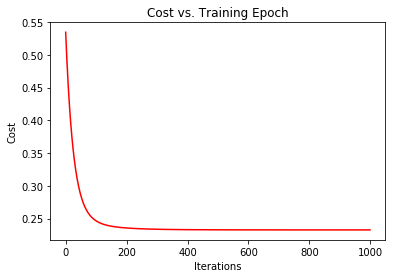

In [84]:
# Iteration vs Error(Cost) plot
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations') 
ax.set_ylabel('Cost')  
ax.set_title('Cost vs. Training Epoch') 

In [78]:
# Normal Equation
theta_norm = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print("Co-efficient matrix after applying Normal Equation : ")
print(theta_norm.T)

finalCost_norm = computeCost(X,Y,theta_norm.T)
print("Cost after applying Normal Equation : ",finalCost_norm)

Y_pred = X_test.dot(theta_norm)
error = computeError(denormalise_price(Y_pred),denormalise_price(Y_test))
print(error)

Co-efficient matrix after applying Normal Equation : 
[[-0.03768711  0.43348361  0.05074058  0.28641966  0.26934991  0.19757631]]
Cost after applying Normal Equation :  0.23261585855442593
16.99023255866699


In [71]:
print("Difference in Final Cost for Normal Equation and Gradient Descent(learning rate=",alpha,",iterations=",iters,") : ")
print(abs(finalCost_norm-finalCost))

Difference in Final Cost for Normal Equation and Gradient Descent(learning rate= 0.5 ,iterations= 1000 ) : 
2.7755575615628914e-17
